# Assignment 7 

In [1]:
using Plots
using LightGraphs
using GraphRecipes
using LinearAlgebra
using Combinatorics: combinations
using Statistics: mean

In [2]:
Threads.nthreads()

8

In [3]:
comb(N, k) = factorial(N) / (factorial(k) * factorial(N - k))

comb (generic function with 1 method)

## 1) Poisson Approximation

The number of links in a complete subgraph is $n \choose 2$

In [4]:
function poisson(λ)
    pmf(x) = λ ^ x * exp(-λ) / factorial(x)
    return pmf
end

poisson (generic function with 1 method)

In [5]:
c = 2
pois = poisson(c)
pois.(0:2)

3-element Array{Float64,1}:
 0.1353352832366127
 0.2706705664732254
 0.2706705664732254

In [6]:
1 - sum(pois.(0:2))

0.3233235838169365

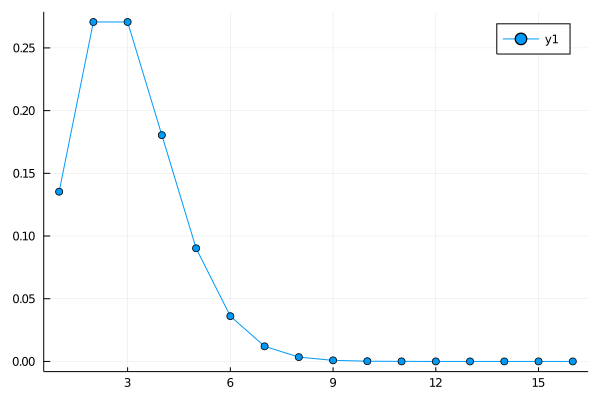

In [7]:
plot(pois.(0:15), marker=true)

## 2) Clustering, transitivity and characteristic path lenght for some specia graphs

In [8]:
circle_step(N, n, step) = ((n - 1) + step + N) % (N) + 1

"""
Return the edges required to compute a
circle(N, m) graph.

For simplicity, we assume that N % 2m == 1
"""
function circle_graph(N::Int64, m::Int64)
    nodes = [0 0]
    div_m = m ÷ 2
    for n=1:N
        n_next = circle_step(N, n, 1)
        n_prev = circle_step(N, n, -1)
        nodes = cat(nodes, [n n_prev; n n_next], dims=1)
        for m_step = 1:(div_m+1)
            n_next = circle_step(N, n, 1 + m_step)
            n_prev = circle_step(N, n, - (1 + m_step))
            nodes = cat(nodes, [n n_prev; n n_next], dims=1)
        end
    end
    return nodes[2:end, :]
end


function circle_graph!(G::SimpleGraph{Int64}, m::Int64)
    N = nv(G)
    circle_nodes = circle_graph(N, m)
    for (n1, n2) in eachrow(circle_nodes)
        add_edge!(G, n1, n2)
    end
    return G
end

circle_graph! (generic function with 1 method)

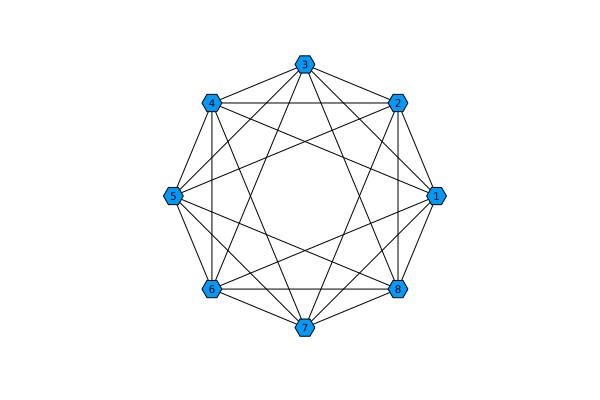

In [9]:
N, m = 8, 3
G = SimpleGraph(N)
circle_graph!(G, m)
A = adjacency_matrix(G)
graphplot(G, curves=false, method=:circular, names=1:N, markersize=0.2)

In [27]:
# Number of triads
m * (2m-1)

15

In [23]:
6binomial(2m, 2) / tr(A ^ 3) 

0.46875

In [35]:
3tr(A ^ 3) / 6binomial(2m, 2)

6.4

In [39]:
diag(A ^ 3) / 2

8-element SparseArrays.SparseVector{Float64,Int64} with 8 stored entries:
  [1]  =  12.0
  [2]  =  12.0
  [3]  =  12.0
  [4]  =  12.0
  [5]  =  12.0
  [6]  =  12.0
  [7]  =  12.0
  [8]  =  12.0

In [45]:
2m

6

In [46]:
diag(A ^ 3) ./ (2m * (2m - 1))

8-element SparseArrays.SparseVector{Float64,Int64} with 8 stored entries:
  [1]  =  0.8
  [2]  =  0.8
  [3]  =  0.8
  [4]  =  0.8
  [5]  =  0.8
  [6]  =  0.8
  [7]  =  0.8
  [8]  =  0.8

In [52]:
3(m - 1) / 2(2m - 1)

0.6

In [28]:
n_triads = binomial(2m, 2)

15

In [11]:
binomial(2m, 2)

15

In [12]:
m

3

In [13]:
3m * (m - 1) / 2

9.0

In [14]:
Matrix(A)

8×8 Array{Int64,2}:
 0  1  1  1  0  1  1  1
 1  0  1  1  1  0  1  1
 1  1  0  1  1  1  0  1
 1  1  1  0  1  1  1  0
 0  1  1  1  0  1  1  1
 1  0  1  1  1  0  1  1
 1  1  0  1  1  1  0  1
 1  1  1  0  1  1  1  0

In [16]:
global_clustering_coefficient(G)

0.8

In [17]:
degree(G)

8-element Array{Int64,1}:
 6
 6
 6
 6
 6
 6
 6
 6

In [18]:
(3 * (m - 1)) / (2 * (2m - 1))

0.6

In [24]:
3 * binomial(m, 2)

9

In [58]:
3/2 * m * (m - 1)

18.0

In [59]:
diag(A ^ 3) / 2

12-element SparseArrays.SparseVector{Float64,Int64} with 12 stored entries:
  [1 ]  =  9.0
  [2 ]  =  9.0
  [3 ]  =  9.0
  [4 ]  =  9.0
  [5 ]  =  9.0
  [6 ]  =  9.0
  [7 ]  =  9.0
  [8 ]  =  9.0
  [9 ]  =  9.0
  [10]  =  9.0
  [11]  =  9.0
  [12]  =  9.0

In [289]:
(diag(A ^ 3) / 2) ./ n_triads

6-element SparseArrays.SparseVector{Float64,Int64} with 6 stored entries:
  [1]  =  0.666667
  [2]  =  0.666667
  [3]  =  0.666667
  [4]  =  0.666667
  [5]  =  0.666667
  [6]  =  0.666667

In [275]:
3(m - 1) / 2(2m - 1)

0.5

In [163]:
sum(A, dims=2) .* (sum(A, dims=2) .- 1)

6×1 Array{Int64,2}:
 12
 12
 12
 12
 12
 12

In [159]:
degree(G) .* (degree(G) .- 1)

6-element Array{Int64,1}:
 12
 12
 12
 12
 12
 12

In [160]:
local_clustering_coefficient(G) / 2

6-element Array{Float64,1}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333

## 3) Watts-Strogatz model

Start with a $(N,m)$ circle graph. A $(N, m, p)$ Watts-Strogatz grapg is constructed by considering each of the links of the circle graph and independently rewriting each of the with some probability $p$

In [24]:
N = 8
m = 4
G = SimpleGraph(N)
G = circle_graph!(G, m)

{8, 24} undirected simple Int64 graph

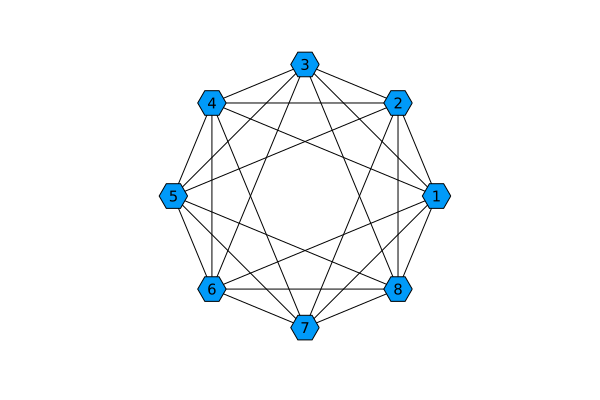

In [26]:
graphplot(G, curves=false, names=1:N, fontsize=10, markersize=0.2, method=:circular)

In [244]:
function watts_strogatz(N::Int64, m::Int64, p::Float64)
    G = SimpleGraph(N)
    circle_nodes = circle_graph(N, m)
    for (n1, n2) in eachrow(circle_nodes)
        add_edge!(G, n1, n2)
    end
    for n=1:N
        neighs = neighbors(G, n)
        for neigh in neighs
            if p > rand()
                new_neigh = rand([i for i in 1:N if i != n])
                add_edge!(G, n, new_neigh)
                rem_edge!(G, n, neigh)
            end
        end
    end
    return G
end

"""
Watz-strogatz model if G is already a circular(N, m)
graph
"""
function watts_strogatz(G::SimpleGraph{Int64}, m::Int64, p::Float64)
    G = copy(G)
    N = nv(G)
    for n=1:N
        neighs = neighbors(G, n)
        for neigh in neighs
            if p > rand()
                possible = [i for i in 1:N if !(i in neighs) & (i != n)]
                if length(possible) > 0
                    new_neigh = rand(possible)
                    add_edge!(G, n, new_neigh)
                    rem_edge!(G, n, neigh)
                end
            end
        end
    end
    return G
end

watts_strogatz

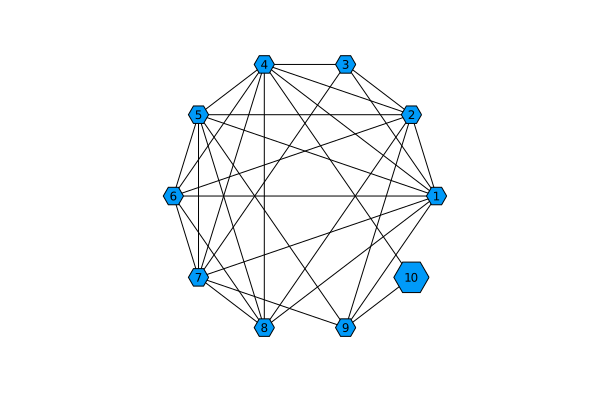

In [245]:
N = 10
m = 4
p = 0.6
G = SimpleGraph(N)
circle_graph!(G, m)

Gws = watts_strogatz(G, m, p)
graphplot(Gws, names=1:N, fontsize=8, markersize=0.2, method=:circular, curves=false)

In [246]:
N = 1000
m = 10
M = 100
p_vals = 0:0.05:1
np_vals = length(p_vals)

21

In [247]:
Vm = zeros(np_vals, M)


@time begin
    G = SimpleGraph(N)
    circle_graph!(G, m)
    Threads.@threads for i=1:np_vals
        p = p_vals[i]
        for j=1:M
            Gws = watts_strogatz(G, m, p)
            Vm[i, j] = global_clustering_coefficient(Gws)
        end
    end
end

106.225686 seconds (129.79 M allocations: 180.020 GiB, 38.73% gc time)


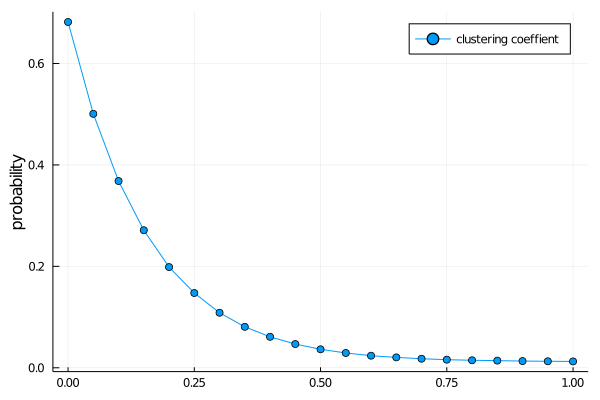

In [248]:
plot(p_vals, mean(Vm, dims=2), marker=true, label="clustering coeffient")
plot!(ylabel="probability")